# Time Series Analysis of Currency Valuation<br>

In this study, valuation of the Indian National Rupee (INR) has been analyzed against the US Dollar (USD). The rupee has been struggling since Demonetization announce on 8th November,2016.On 1st January,2017 Indian Rupee stood at the value 68 against US Dollar.Today it is close to 74.5<br>
   
   The concepts used in this analysis are regularly used in time series analysis. We begin by visualizing the obtained series. Various statistical properties of the series have been found out to explain the behavior of the series. Before moving on to building models, it is important to make the series behave like a stationary series. A stationary time series eliminates the effect of trend, seasonality and variance (any possible noise) on the final model.<br>
   
   In an effort to make the series weakly stationary, various techniques have been tried. Each method has been analyzed statistically to find the series which behaves the most like a stationary series. After selecting the best method, the entire data series is transformed. Usually after this, the autocorrelation function (ACF) and the partial autocorrelation function (PACF) are found to study any possible correlations with the lagged values of the series. Results from ACF and PACF are then piped into possible models studied for analysis.<br>

### Methodology:

1. __Loading The essential modules and data__<br>
 ***
2. __Data Description and Visualization__<br>
 ***
3. __Stationarity analysis__<br>
3.1 Evaluating stationarity:<br>
3.2 Introducing stationarity<br>
A. Difference between data and moving average<br>
B. Moving average of log(data)<br>
C. Exponentially Weighted Moving Average of Log<br>
D. First order differencing of Log<br>
E. Decomposition (Trend+Seasonal+Residual)<br>
F. Comparison<br>
 3.3 ACF & PACF
 ***
4. __Forecast__:<br>
4.1 ARIMA 1-day Ahead Forecast<br>
4.2 ARIMA Multiple Day Ahead Forecast<br>
4.3 Feedforward Neural Network (FNN)<br>
4.4 LSTM- Recurrent Neural Network (LSTM-RNN)<br>
4.4 LSTM- Recurrent Neural Network (LSTM-RNN)<br>
4.5 DNN - Multi-step ahead forecast<br>
4.6 LSTM<br>
 ***


## 1.Loading The essential modules and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

from datetime import datetime,timedelta, date 
from forex_python.converter import CurrencyRates


In [2]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error as MSE

from  keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
from keras import layers
from keras.initializers import Zeros
from keras.callbacks import EarlyStopping
from keras.models import load_model


# Set random seed
np.random.seed(0)

Using TensorFlow backend.
/Users/suyash/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/suyash/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/suyash/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/suyash/opt/anaconda3/lib/python3.7

In [3]:
# Set figure size for all matplotlib figures
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5

### Loading the Data

In [4]:
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)


c = CurrencyRates()
start_date = date(2017, 1, 1)
end_date = date.today()
data = []
for single_date in daterange(start_date, end_date):
    date_obj = datetime.combine(single_date, datetime.min.time())
    value = c.get_rate('USD', 'INR', date_obj)

    data.append([single_date.strftime('%Y-%m-%d'), value])
df = pd.DataFrame(data,columns=['Day','Rate'])
df.set_index('Day',inplace=True)

## 2.Data Description and Visualization

In [5]:
df.head()

,Rate
Day,
2017-01-01,67.919078
2017-01-02,68.139513
2017-01-03,68.368801
2017-01-04,68.064578
2017-01-05,67.935816


In [6]:
df.tail()

,Rate
Day,
2020-11-12,74.689170
2020-11-13,74.639018
2020-11-14,74.639018
2020-11-15,74.639018
2020-11-16,74.454353


In [7]:
df.describe()

,Rate
count,1416.000000
mean,69.374475
std,3.777587
min,63.369863
25%,65.191893
50%,69.650449
75%,71.814952
max,76.936422


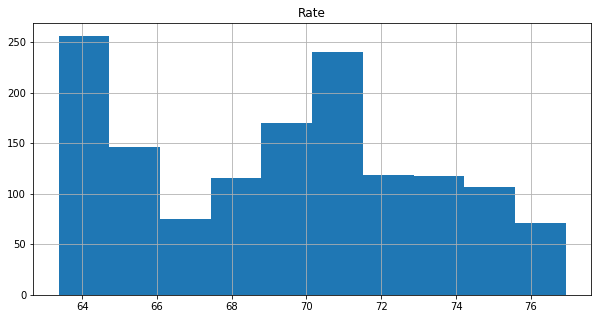

In [8]:
# Plot a histogram
df.hist()
plt.show()

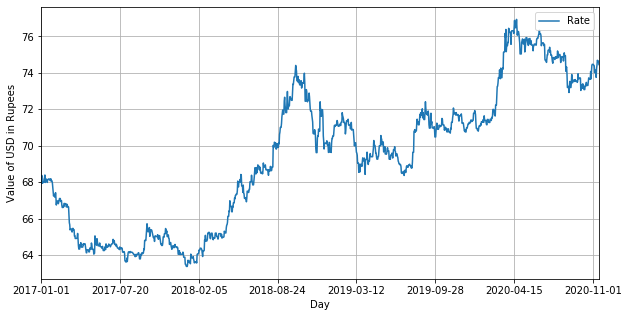

In [9]:
plt.rcParams["figure.figsize"] = fig_size
df.plot()
plt.ylabel('Value of USD in Rupees')
plt.grid()

## 3. Stationarity analysis

### 3.1 Evaluating stationarity

In [10]:
# ADF test on raw data (without transformation)

df_test = adfuller(df['Rate'], autolag='AIC')
result = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    result['Critical Value (%s)'%key] = value
print (result)

Test Statistic                   -0.623266
p-value                           0.865638
#Lags Used                       13.000000
Number of Observations Used    1402.000000
Critical Value (1%)              -3.435023
Critical Value (5%)              -2.863604
Critical Value (10%)             -2.567869
dtype: float64


__Conclusions:__<br>
1. Absolute value of t-statistic is much lesser than any critical value. <br>
2. p-value is very close to 1 than 0.<br>

Therefore, we accept the null hypothesis. In other words, this series is far from stationarity.
In the following section, a few possible methods of inducing stationarity are evaluated.

## 3.2 Introducing stationarity

### A. Difference between data and moving average

In this transformation, the trend is evaluated by subtracting rolling mean of data points over a specified time window from the original series. 

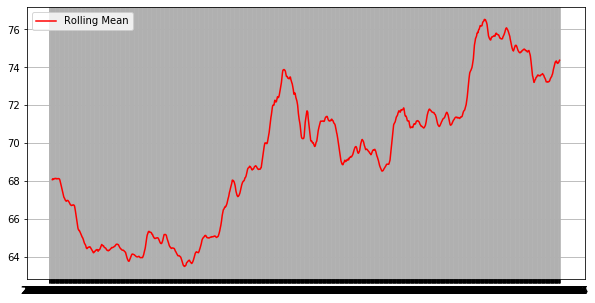

In [13]:
# Calculate and plot the rolling mean

rolling_mean = pd.Series.rolling(df['Rate'],window=10,center=False).mean()
plt.rcParams["figure.figsize"] = fig_size
#rate_data.plot()
rmean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.grid()
plt.show()

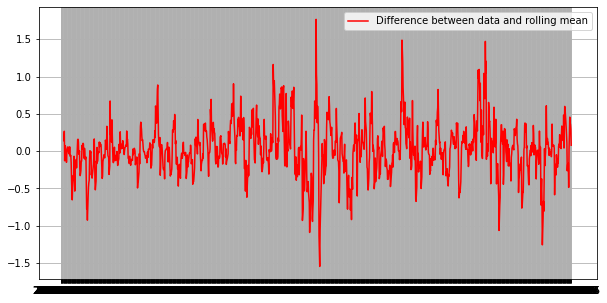

In [14]:
# Subtract rolling mean from the data and plot

rolling_mean_diff=df['Rate']-rolling_mean
#plt.rcParams["figure.figsize"] = fig_size
plt.plot(rolling_mean_diff, color='red',label='Difference between data and rolling mean')
plt.legend(loc='best')
plt.grid()
plt.show()
rolling_mean_diff.dropna(inplace=True)

In [15]:
# ADF on transformed data
df_rmean_diff = adfuller(rolling_mean_diff, autolag='AIC')
result_rmean_diff = pd.Series(df_rmean_diff[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_rmean_diff[4].items():
    result_rmean_diff['Critical Value (%s)'%key] = value
print (result_rmean_diff)

Test Statistic                -7.079669e+00
p-value                        4.701986e-10
#Lags Used                     1.500000e+01
Number of Observations Used    1.391000e+03
Critical Value (1%)           -3.435060e+00
Critical Value (5%)           -2.863620e+00
Critical Value (10%)          -2.567877e+00
dtype: float64


__Conclusions:__<br>
1. The p-value is also almost zero.<br>

This is an acceptable level of stationarity. However, in most cases, a better degree of stationarity can be obtained.


### B. Moving average of log(data)

It is a very common practice to take the logarithmic transform of the data to compress possible deviations. Here, we take the logarithm of the data, calculate the rolling mean of the logarithm and subtract it from the logarithmic transform.

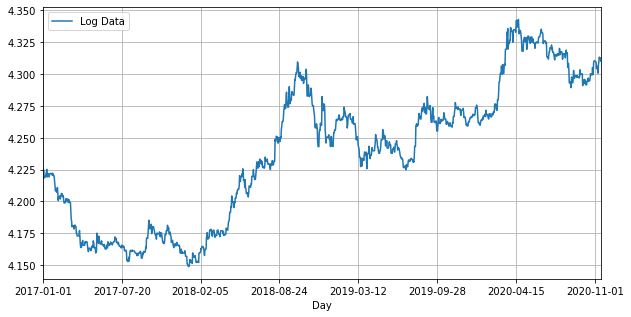

In [16]:
# Calculate and plot logarithm of the data
rate_data_log=np.log(df['Rate'])
plt.rcParams["figure.figsize"] = fig_size
rate_data_log.plot(label='Log Data')
plt.legend(loc='best')
plt.grid()
plt.show()


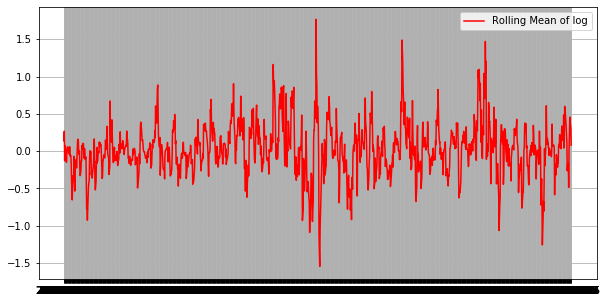

In [17]:
# Calculate and plot differnece between rolling mean of logarithm and the logarithm
log_rolling_mean=pd.Series.rolling(rate_data_log,window=10,center=False).mean()
plt.rcParams["figure.figsize"] = fig_size
log_rolmean_diff=rate_data_log-log_rolling_mean
log_rmean_diff= plt.plot(rolling_mean_diff, color='red', label='Rolling Mean of log')
plt.legend(loc='best')
plt.grid()
plt.show()
log_rolmean_diff.dropna(inplace=True)


In [18]:
# Perform ADF on the transformation
df_test_log = adfuller(log_rolmean_diff, autolag='AIC')
result_log = pd.Series(df_test_log[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test_log[4].items():
    result_log['Critical Value (%s)'%key] = value
print (result_log)

Test Statistic                -8.108121e+00
p-value                        1.246828e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.395000e+03
Critical Value (1%)           -3.435046e+00
Critical Value (5%)           -2.863614e+00
Critical Value (10%)          -2.567874e+00
dtype: float64


### C. Exponentially Weighted Moving Average of Log


In this step, instead of taking the moving average, we take the exponentially weighted moving average and perform similar analysis.

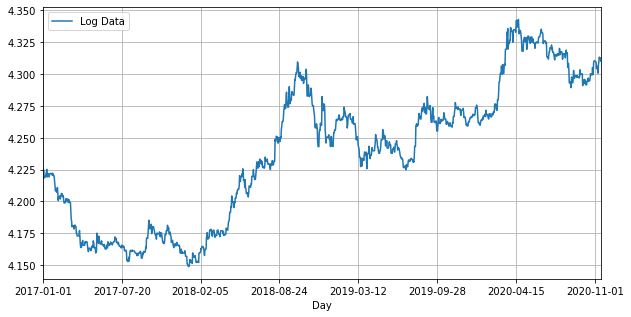

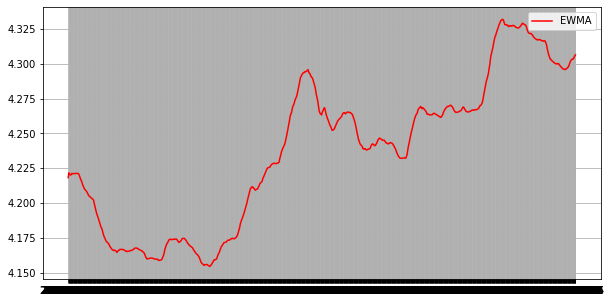

In [19]:
ewma_data=pd.Series.ewm(rate_data_log,halflife=10,min_periods=0,adjust=True,ignore_na=False).mean()
plt.rcParams["figure.figsize"] = fig_size
rate_data_log.plot(label='Log Data')
plt.legend(loc='best')
plt.grid()
plt.show()

# Calculate EWMA and plot
plt.plot(ewma_data, color='red',label='EWMA')
plt.legend()
plt.legend(loc='best')
plt.grid()
plt.show()

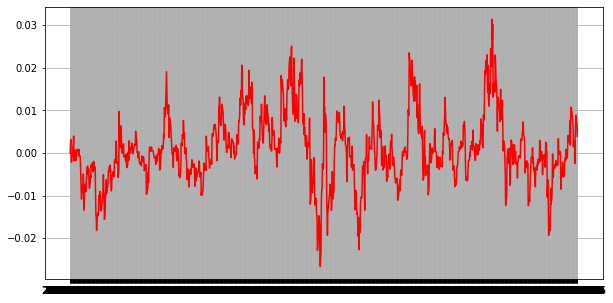

In [20]:
# Calculate and plot difference

ewma_diff=rate_data_log-ewma_data
plt.rcParams["figure.figsize"] = fig_size
plt.plot(ewma_diff, color='red')
plt.grid()
plt.show()

In [21]:
# Perform ADF test

df_test_ewma = adfuller(ewma_diff, autolag='AIC')
result_ewma = pd.Series(df_test_ewma[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test_ewma[4].items():
    result_ewma['Critical Value (%s)'%key] = value
print (result_ewma)

Test Statistic                -5.811098e+00
p-value                        4.399555e-07
#Lags Used                     3.000000e+00
Number of Observations Used    1.412000e+03
Critical Value (1%)           -3.434990e+00
Critical Value (5%)           -2.863589e+00
Critical Value (10%)          -2.567861e+00
dtype: float64


### D. First order differencing

First order differencing is probably the single most widely used transformation in time series. This transformation is taken by subtracting consecutive points of the series. Even though the first point is lost, this does not matter a lot given the length of the series.

No handles with labels found to put in legend.


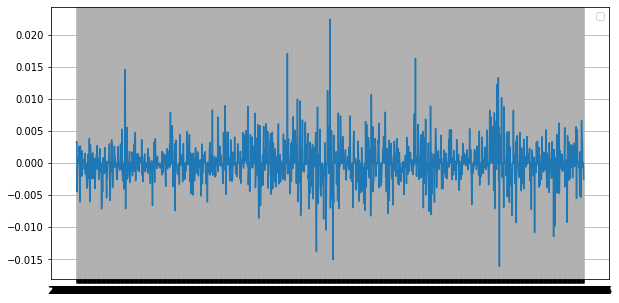

In [22]:
# Calculate and plot the first order differnece

rate_log_diff = rate_data_log - rate_data_log.shift()
rate_log_diff.dropna(inplace=True)
plt.rcParams["figure.figsize"] = fig_size
plt.plot(rate_log_diff)
plt.legend('Log Data')
plt.legend(loc='best')
plt.grid()
plt.show()


In [23]:
# Perform ADF test

df_test_logdiff = adfuller(rate_log_diff, autolag='AIC')
result_logdiff = pd.Series(df_test_logdiff[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test_logdiff[4].items():
    result_logdiff['Critical Value (%s)'%key] = value
print (result_logdiff)

Test Statistic                  -28.126119
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1413.000000
Critical Value (1%)              -3.434986
Critical Value (5%)              -2.863588
Critical Value (10%)             -2.567860
dtype: float64


### E. Decomposition (Trend+Seasonal+Residual)

The logarithm of the series is decomposed into trend, seasonality and residual.

In [110]:
df.index = pd.to_datetime(df.index)

In [111]:
# Decompose logarithm of the series
rate_data_log=np.log(df['Rate'])
decomposition = seasonal_decompose(rate_data_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
resid = decomposition.resid

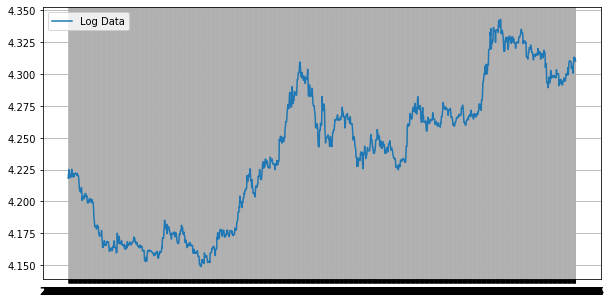

In [25]:
# Plot logarithm of series
plt.rcParams["figure.figsize"] = fig_size
plt.plot(rate_data_log,label='Log Data')
plt.legend()
plt.grid()
plt.show()

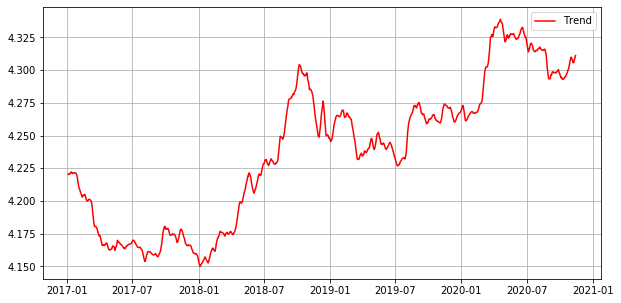

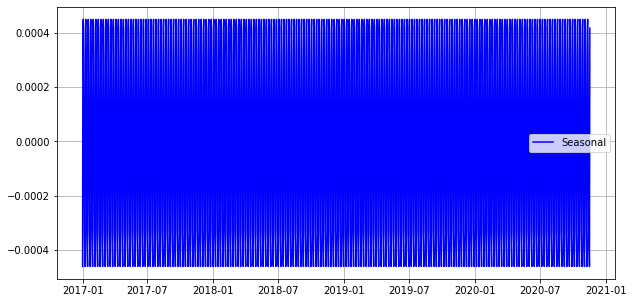

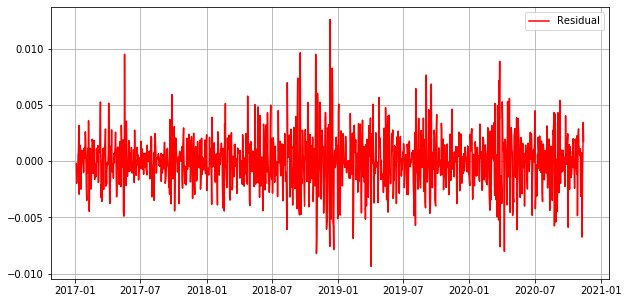

In [112]:
# Plot trend, seasonality and residual
plt.plot(trend,color='red',label='Trend')
plt.legend()
plt.grid()
plt.show()

plt.plot(seasonal,color='Blue',label='Seasonal')
plt.legend()
plt.grid()
plt.show()

plt.plot(resid,color='red',label='Residual')
plt.legend()
plt.grid()
plt.show()

In [113]:
# Perform ADT
resid.dropna(inplace=True)

df_test_resid = adfuller(resid, autolag='AIC')
result_resid = pd.Series(df_test_resid[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in df_test_resid[4].items():
    result_resid['Critical Value (%s)'%key] = value
print (result_resid)

Test Statistic                -1.296249e+01
p-value                        3.203630e-24
#Lags Used                     2.400000e+01
Number of Observations Used    1.385000e+03
Critical Value (1%)           -3.435080e+00
Critical Value (5%)           -2.863629e+00
Critical Value (10%)          -2.567882e+00
dtype: float64


### F. Comparison

In [114]:
compare=pd.DataFrame({'Test Statistic':[result_rmean_diff.iloc[0],result_log.iloc[0],result_ewma.iloc[0],result_logdiff.iloc[0],result_resid.iloc[0]],
                      'p-value':[result_rmean_diff.iloc[1],result_log.iloc[1],result_ewma.iloc[1],result_logdiff.iloc[1],result_resid.iloc[1]]})
Methods=['Data Rolling mean','Log Data Rolling Mean','Log EWMA','First Order Differencing','Seasonal Decomposition']
compare['Methods']=Methods
compare=compare.set_index('Methods')
compare

,Test Statistic,p-value
Methods,,
Data Rolling mean,-7.079669,4.701986e-10
Log Data Rolling Mean,-8.108121,1.246828e-12
Log EWMA,-5.811098,4.399555e-07
First Order Differencing,-28.126119,0.000000e+00
Seasonal Decomposition,-12.962489,3.203630e-24


Evidently, first order differencing gives the best smoothing to the data. It is very commonly used for making time series stationary because it seldom fails. However, we explored a few other smoothing techniques only to be sure. 
First order differencing is selected to transform the series.


### 3.3 Determine time lags

#### ACF & PACF

The general that can be followed to decide the orders of the autoregression (AR) and moving average (MA) is listed in the table below.

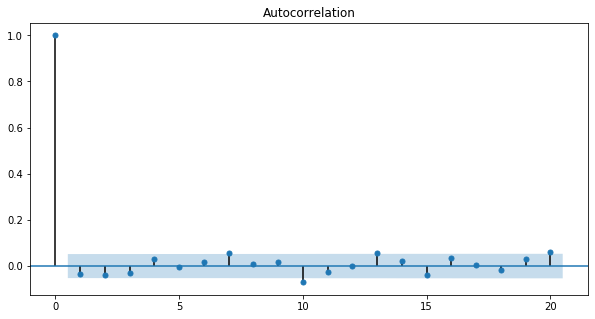

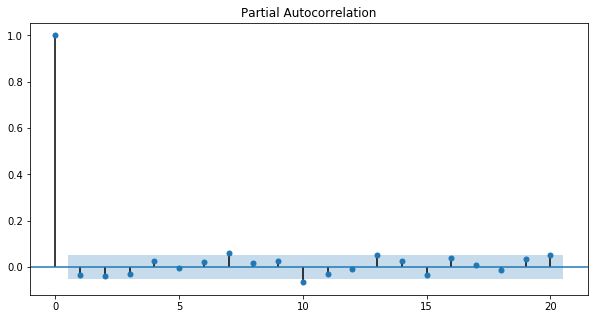

In [29]:
plot_acf(rate_log_diff,lags=20)
plt.show()

plot_pacf(rate_log_diff,lags=20)
plt.show()


In this case, both ACF and PACF cut-off after the first lag. There is no rigid indication of the orders p and q as required by ARIMA. The closest contenders are ARIMA(1,1,1) and ARIMA(1,1,0). We shall analyze both of these methods.

## 4. Forecast<br>
After we have figured out the possible correlation of values with their lags, in this section, we will model an ARIMA model, a feedforward neural network (FNN) and long term short memory (LSTM) recurrent neural network (RNN) to fit the data. Usually, models for univariate time series analysis, such as this one, do not generalize well for multi-step ahead prediction, unless there is a good correlation with the lagged values. Since, our ACF and PACF do not indicate an appreciable correlation with lagged values, we will limit our prediction to only one data point after the last data point.

### 4.1 ARIMA 1-day Ahead Forecast

In [67]:
data1 = rate_data_log.values
train_size = int(np.floor(len(data1)*0.9))

train = list(data1[0:train_size])
test = list(data1[train_size:])


train_list = [x for x in train]
predictions = []

for t in range(len(test)):
    model = ARIMA(np.array(train),order=(1,1,0))
    fit = model.fit()
    forecast = float(fit.forecast()[0])
    predictions.append(forecast)
    train.append(float(test[t]))

Mean squared error: 0.046575


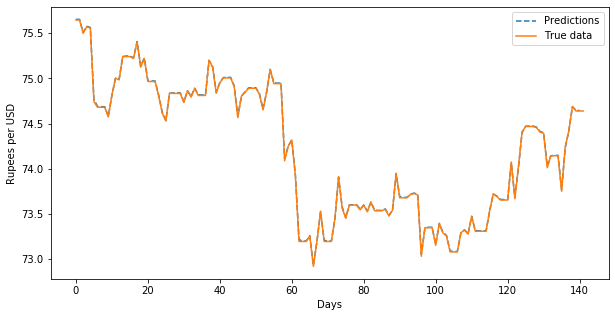

In [66]:
plt.plot(np.exp(predictions)[1:],'--',label='Predictions')
plt.plot(np.exp(test),label='True data')
plt.ylabel('Rupees per USD')
plt.xlabel('Days')
plt.legend()
plt.plot()

print ('Mean squared error: {0:3f}'.format(MSE(np.exp(test),np.exp(predictions))))

In [40]:
## Value of currency tomorrow will be:

#Tomorrow's value
train = list(data1)

train_list = [x for x in train]
predictions = []

model = ARIMA(np.array(train),order=(1,1,0))
fit = model.fit()
forecast = float(fit.forecast()[0])

tomorrow_value = np.exp(forecast)

# Today's value

rate_data_log = rate_data_log[:-1]
data1 = rate_data_log.values
train = list(data1)

train_list = [x for x in train]
predictions = []

model = ARIMA(np.array(train),order=(1,1,0))
fit = model.fit()
forecast = float(fit.forecast()[0])
today_value = np.exp(forecast)

In [43]:
print ("Today's actual value is {0:3f} and model predicted {1:3f}.".format(df.values[-1][0],today_value))
print ("Model predicts value will be {0:3f} tomorrow.".format(tomorrow_value))

Today's actual value is 74.454353 and model predicted 74.644162.
Model predicts value will be 74.465636 tomorrow.


### 4.2 ARIMA Multiple Day Ahead Forecast

Mean squared error: 4.459486


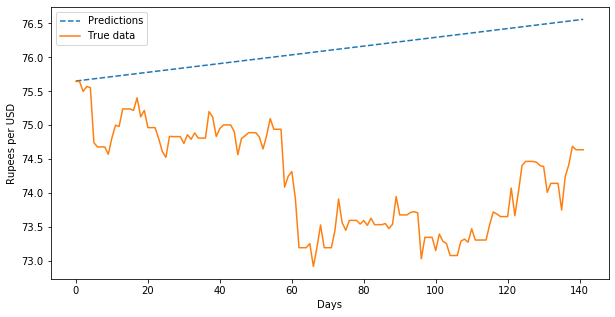

In [60]:
data1 = rate_data_log.values
train_size = int(np.floor(len(data1)*0.9))

train = list(data1[0:train_size])
test = list(data1[train_size:])


model = ARIMA(np.array(train),order=(1,1,0))
fit = model.fit()
predictions = fit.forecast(len(test))[0]
plt.plot(np.exp(predictions),'--',label='Predictions')
plt.plot(np.exp(test),label='True data')
#plt.plot(np.exp(full_predictions),label='Full prediction')
plt.ylabel('Rupees per USD')
plt.xlabel('Days')
plt.legend()
plt.plot()

print ('Mean squared error: {0:3f}'.format(MSE(np.exp(test),np.exp(predictions))))


Since, ARIMA is a linear model, forecasting using ARIMA for anywhere more than 1 day fails miserably. The model continues the upward increasing trend indifinitely.<br>
Let's try to see how a simple feedforward neural (FNN) and LSTM Recurrent Neural Network (RNN) performs with this time series data.

### 4.3 Feedforward Neural Network (FNN)

In [69]:
data1 = rate_data_log.values
train = list(data1[0:train_size])
test = list(data1[train_size:])

In [79]:
def gen_XY(t_list,size):
    '''
    Generates an autoregressive lagged array.
    
    Parameters
    ----------
    1. t_list: (list) Data to generate an autoregressive array out of.
    2. size: (int) Number of lagged values to consider.
    
    Returns
    ----------
    1. X: (np.ndarray) Autoregressive feature array.
    2. Y.T: (np.ndarray) Column array with values of response variable.
    
    '''
    X = np.zeros([1,size])
    Y = []
    temp_list=[]
    for i in range(len(t_list)-size):
        add_list = t_list[i:i+size]
        target = t_list[i+size]
        X = np.append(X,np.array([add_list]),axis=0)
        Y.append(target)
        
    X = np.delete(X,0,axis=0)
    Y = np.array(Y)
    
    return X,Y.T

In [80]:
X_train,y_train = gen_XY(train,1)
X_test,y_test = gen_XY(test,1)

### 1 Hidden Layers with 1 neuron and relu activation function

In [173]:
K.clear_session()
model = Sequential()
model.add(Dense(1, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
1317/1317 [==============================] - 0s 158us/step - loss: 10.8710
Epoch 2/20
1317/1317 [==============================] - 0s 29us/step - loss: 8.3206
Epoch 3/20
1317/1317 [==============================] - 0s 31us/step - loss: 6.2529
Epoch 4/20
1317/1317 [==============================] - 0s 29us/step - loss: 4.6063
Epoch 5/20
1317/1317 [==============================] - 0s 29us/step - loss: 3.3204
Epoch 6/20
1317/1317 [==============================] - 0s 30us/step - loss: 2.3377
Epoch 7/20
1317/1317 [==============================] - 0s 29us/step - loss: 1.6044
Epoch 8/20
1317/1317 [==============================] - 0s 30us/step - loss: 1.0715
Epoch 9/20
1317/1317 [==============================] - 0s 28us/step - loss: 0.6949
Epoch 10/20
1317/1317 [==============================] - 0s 27us/step - loss: 0.4369
Epoch 11/20
1317/1317 [==============================] - 0s 25us/step - loss: 0.2658
Epoch 12/20
1317/1317 [==============================] - 0s 27us/step - 

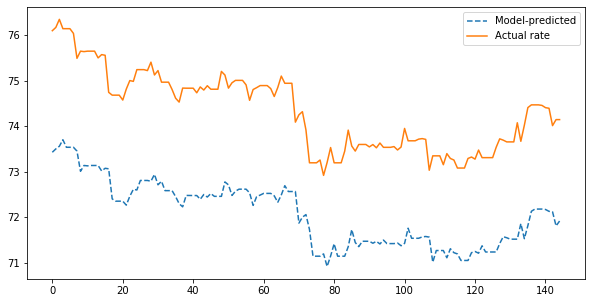

MSE: 5.127865


In [174]:
y_pred  =  model.predict(X_test)
plt.plot(np.exp(y_pred),'--',label='Model-predicted')
plt.plot(np.exp(y_test),label='Actual rate')
plt.legend()
plt.show()
print('MSE: %f'%(MSE(np.exp(y_test), np.exp(y_pred))))

### 2 Hidden Layers with 50 neurons each and ReLU activation function

In [175]:
K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
1317/1317 [==============================] - 0s 161us/step - loss: 1.2636
Epoch 2/20
1317/1317 [==============================] - 0s 46us/step - loss: 2.0250e-04
Epoch 3/20
1317/1317 [==============================] - 0s 41us/step - loss: 1.0015e-05
Epoch 4/20
1317/1317 [==============================] - 0s 41us/step - loss: 1.0139e-05
Epoch 5/20
1317/1317 [==============================] - 0s 43us/step - loss: 1.0189e-05
Epoch 6/20
1317/1317 [==============================] - 0s 40us/step - loss: 1.0174e-05
Epoch 7/20
1317/1317 [==============================] - 0s 40us/step - loss: 1.0362e-05
Epoch 8/20
1317/1317 [==============================] - 0s 38us/step - loss: 1.0333e-05
Epoch 9/20
1317/1317 [==============================] - 0s 39us/step - loss: 1.0214e-05
Epoch 10/20
1317/1317 [==============================] - 0s 38us/step - loss: 1.0114e-05
Epoch 11/20
1317/1317 [==============================] - 0s 47us/step - loss: 1.0372e-05
Epoch 12/20
1317/1317 [==========

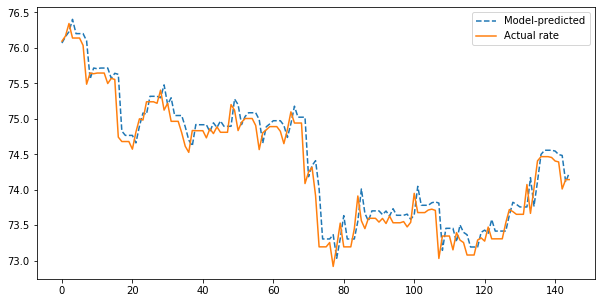

MSE: 0.055156


In [179]:
y_pred  =  model.predict(X_test)
plt.plot(np.exp(y_pred),'--',label='Model-predicted')
plt.plot(np.exp(y_test),label='Actual rate')
plt.legend()
plt.show()
print('MSE: %f'%(MSE(np.exp(y_test), np.exp(y_pred))))

### 4 Hidden Layers with 100 neurons each and ReLU activation function

In [180]:
K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
1317/1317 [==============================] - 0s 173us/step - loss: 0.3553
Epoch 2/20
1317/1317 [==============================] - 0s 71us/step - loss: 5.1874e-05
Epoch 3/20
1317/1317 [==============================] - 0s 72us/step - loss: 1.0569e-05
Epoch 4/20
1317/1317 [==============================] - 0s 77us/step - loss: 1.0412e-05
Epoch 5/20
1317/1317 [==============================] - 0s 62us/step - loss: 1.0221e-05
Epoch 6/20
1317/1317 [==============================] - 0s 63us/step - loss: 1.0685e-05
Epoch 7/20
1317/1317 [==============================] - 0s 59us/step - loss: 1.0280e-05
Epoch 8/20
1317/1317 [==============================] - 0s 56us/step - loss: 1.0447e-05
Epoch 9/20
1317/1317 [==============================] - 0s 75us/step - loss: 1.1705e-05
Epoch 10/20
1317/1317 [==============================] - 0s 66us/step - loss: 1.0430e-05
Epoch 11/20
1317/1317 [==============================] - 0s 52us/step - loss: 1.0418e-05
Epoch 12/20
1317/1317 [==========

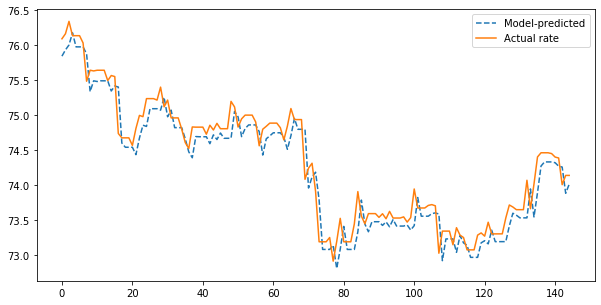

MSE: 0.057531


In [181]:
y_pred  =  model.predict(X_test)
plt.plot(np.exp(y_pred),'--',label='Model-predicted')
plt.plot(np.exp(y_test),label='Actual rate')
plt.legend()
plt.show()
print('MSE: %f'%(MSE(np.exp(y_test), np.exp(y_pred))))

### 4.4 LSTM- Recurrent Neural Network (LSTM-RNN)

In [72]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [73]:
X_tr_t.shape

(1272, 1, 1)

In [191]:
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(10, input_shape=(1, X_train.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
model_lstm.add(Dense(10,input_shape=(1, X_train.shape[1]), activation='relu'))

model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])


Epoch 1/200
1317/1317 [==============================] - 2s 1ms/step - loss: 0.7418
Epoch 2/200
1317/1317 [==============================] - 1s 1ms/step - loss: 1.0397e-05
Epoch 3/200
1317/1317 [==============================] - 1s 1ms/step - loss: 1.1206e-05
Epoch 4/200
1317/1317 [==============================] - 1s 1ms/step - loss: 1.2592e-05
Epoch 5/200
1317/1317 [==============================] - 1s 1ms/step - loss: 1.5518e-05
Epoch 6/200
1317/1317 [==============================] - 1s 1ms/step - loss: 1.8840e-05
Epoch 7/200
1317/1317 [==============================] - 1s 1ms/step - loss: 2.9353e-05
Epoch 8/200
1317/1317 [==============================] - 1s 1ms/step - loss: 3.7184e-05
Epoch 9/200
1317/1317 [==============================] - 1s 1ms/step - loss: 4.1156e-05
Epoch 10/200
1317/1317 [==============================] - 1s 1ms/step - loss: 4.2039e-05
Epoch 11/200
1317/1317 [==============================] - 1s 1ms/step - loss: 4.2045e-05
Epoch 12/200
1317/1317 [==========

In [192]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)

print("The MSE on the Train set is:\t{:0.3f}".format(MSE(np.exp(y_train), np.exp(y_train_pred_lstm))))
print("The MSE on the Test set is:\t{:0.3f}".format(MSE(np.exp(y_test), np.exp(y_pred_test_lstm))))


The MSE on the Train set is:	0.058
The MSE on the Test set is:	0.071


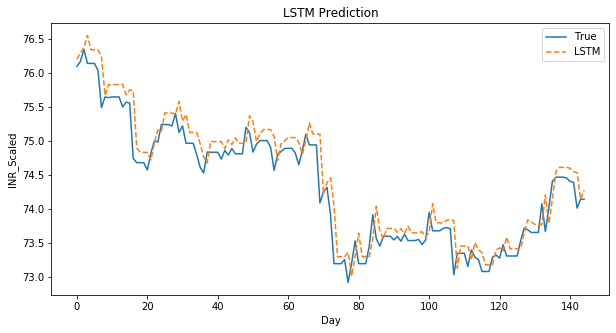

In [194]:
plt.plot(np.exp(y_test), label='True')
plt.plot(np.exp(y_pred_test_lstm),'--',label='LSTM')
plt.title("LSTM Prediction")
plt.xlabel('Day')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

### 4.5 DNN - Multi-step ahead forecast

In [81]:
data1 = rate_data_log.values
train_size = int(np.floor(len(data1)*0.92))
train = list(data1[0:train_size])
test = list(data1[train_size:])

In [82]:
X_train,y_train = gen_XY(train,10)

In [92]:
K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(10,), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(10,), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
1291/1291 [==============================] - 0s 142us/step - loss: 2.2054
Epoch 2/20
1291/1291 [==============================] - 0s 66us/step - loss: 4.3226e-04
Epoch 3/20
1291/1291 [==============================] - 0s 57us/step - loss: 6.8753e-05
Epoch 4/20
1291/1291 [==============================] - 0s 62us/step - loss: 6.7521e-05
Epoch 5/20
1291/1291 [==============================] - 0s 60us/step - loss: 6.7801e-05
Epoch 6/20
1291/1291 [==============================] - 0s 63us/step - loss: 7.0437e-05
Epoch 7/20
1291/1291 [==============================] - 0s 60us/step - loss: 6.9263e-05
Epoch 8/20
1291/1291 [==============================] - 0s 63us/step - loss: 7.0404e-05
Epoch 9/20
1291/1291 [==============================] - 0s 60us/step - loss: 7.0011e-05
Epoch 10/20
1291/1291 [==============================] - 0s 65us/step - loss: 6.9442e-05
Epoch 11/20
1291/1291 [==============================] - 0s 62us/step - loss: 7.1347e-05
Epoch 12/20
1291/1291 [==========

In [93]:
X_test_init

array([4.35119581, 4.35149622, 4.35179615, 4.35209513, 4.3523941 ,
       4.35269165, 4.3529892 , 4.35328484, 4.35358095, 4.35387611])

In [84]:
pred = []
X_test_init = X_train[-1]
forecast_length = len(test)
for i in range(forecast_length):
    forecast = model.predict(X_test_init.reshape(1,10))[0][0]
    pred.append(forecast)
    X_test_init = np.append(X_test_init[1:],forecast)

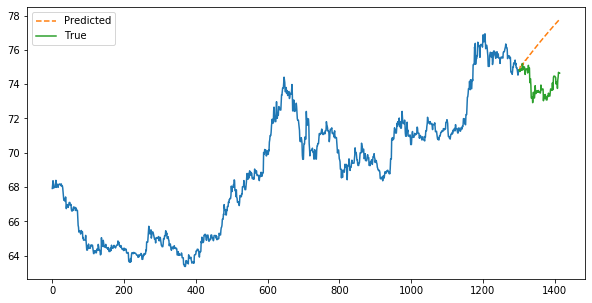

7.285721129766353

In [85]:
plt.plot(np.exp(train))
plt.plot(range(train_size,len(data1)),np.exp(pred),'--',label='Predicted')
plt.plot(range(train_size,len(data1)),np.exp(test),label='True')
plt.legend()
plt.show()
MSE(np.exp(test),np.exp(pred))

### 4.6 LSTM

In [94]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

In [101]:
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(20, input_shape=(1, X_train.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
model_lstm.add(Dense(20,input_shape=(1, X_train.shape[1]), activation='relu'))

model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
1291/1291 [==============================] - 2s 2ms/step - loss: 0.2012
Epoch 2/200
1291/1291 [==============================] - 2s 2ms/step - loss: 5.9714e-05
Epoch 3/200
1291/1291 [==============================] - 2s 2ms/step - loss: 5.7517e-05
Epoch 4/200
1291/1291 [==============================] - 2s 2ms/step - loss: 4.6429e-05
Epoch 5/200
1291/1291 [==============================] - 2s 2ms/step - loss: 7.4802e-05
Epoch 6/200
1291/1291 [==============================] - 2s 1ms/step - loss: 1.4629e-04
Epoch 7/200
1291/1291 [==============================] - 2s 1ms/step - loss: 1.5649e-04
Epoch 8/200
1291/1291 [==============================] - 2s 1ms/step - loss: 1.5501e-04
Epoch 9/200
1291/1291 [==============================] - 2s 1ms/step - loss: 1.5285e-04
Epoch 00009: early stopping


In [102]:
test_array = X_tr_t[-1][0]
pred = []
forecast_length = len(test)
for i in range(forecast_length):
    y_train_pred_lstm = model_lstm.predict(test_array.reshape(1,1,10))
    pred.append(y_train_pred_lstm[0][0])
    test_array = np.append(test_array[1:],y_train_pred_lstm[0][0])

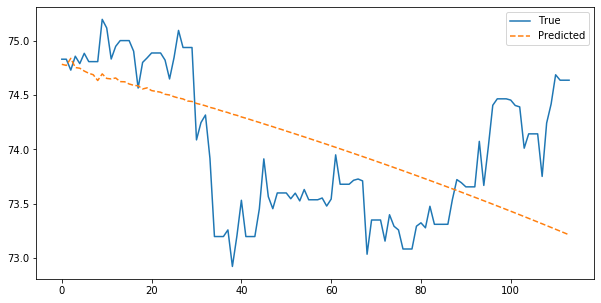

In [103]:
plt.plot(np.exp(test),label='True')
plt.plot(np.exp(pred),'--',label='Predicted')
plt.legend()
plt.show()

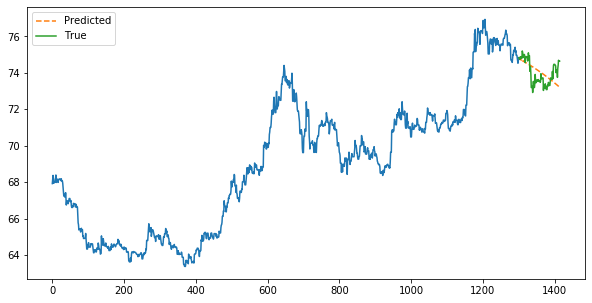

0.42298277501777365

In [104]:
plt.plot(np.exp(train))
plt.plot(range(train_size,len(data1)),np.exp(pred),'--',label='Predicted')
plt.plot(range(train_size,len(data1)),np.exp(test),label='True')
plt.legend()
plt.show()
MSE(np.exp(test),np.exp(pred))